# Clustering Case Study

**What do the instances that comprise the dataset represent?**

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

**Additional Information**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

data source : https://archive.ics.uci.edu/ml/datasets/seeds

Charytanowicz, Magorzata, Niewczas, Jerzy, Kulczycki, Piotr, Kowalski, Piotr & Lukasik, Szymon. (2012). seeds. UCI Machine Learning Repository.

# Import Libraries

In [5]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format

# Ingest Data  

In [6]:
df = pd.read_csv("seeds_dataset.txt",header=None, delim_whitespace=True)# no columns name , so we use header none.. ıt write numbers..
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,1
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,1
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,1
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,1


In [7]:
df.iloc[:,7].value_counts()

1    70
2    70
3    70
Name: 7, dtype: int64

# EDA

## Implement basic steps to see how is your data looks like

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
df.shape

(210, 8)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum().any()

False

## Convert columns names and Map Class names

In [12]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [13]:
df.columns  = ["area", "perimeter", "compactness", "length_of_kernel", "width_of_kernel", "assym_coef", "length_of_kernel_groove", "kernel_class" ]

In [14]:
df.columns 

Index(['area', 'perimeter', 'compactness', 'length_of_kernel',
       'width_of_kernel', 'assym_coef', 'length_of_kernel_groove',
       'kernel_class'],
      dtype='object')

In [15]:
df["kernel_class"] = df.kernel_class.map({1:"Kama", 2:"Rosa",3:"Canadian"})

In [16]:
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,Kama


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   assym_coef               210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   kernel_class             210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


## Visualy inspect the some features

In [18]:
def column_histogram(col):
    fig = px.histogram(df,
                       x=col,
                       #nbins=80,
                       )
    fig.show()
cols = df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

In [19]:
def column_histogram(col):
    fig = px.histogram(df,
                       x=col,
                       #nbins=80,
                       color="kernel_class",)
    fig.show()
cols = df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

In [23]:
def column_boxer(col):
    df[col].iplot("box")
cols = df.columns    

interact(column_boxer,col = cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

In [24]:
def column_boxer1(col):
    fig = px.box(df,
                 color = "kernel_class",
                 y= col)
    fig.show() 
cols = df.columns    
interact(column_boxer1,col = cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

## Decriptive statistics

In [25]:
df.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22
75%,17.30,15.71,0.89,5.98,3.56,4.77,5.88
max,21.18,17.25,0.92,6.67,4.03,8.46,6.55


In [26]:
fig = px.imshow(df.corr(),
                height=1000,
                width=1000,
                range_color=[-1,1])
fig.show()

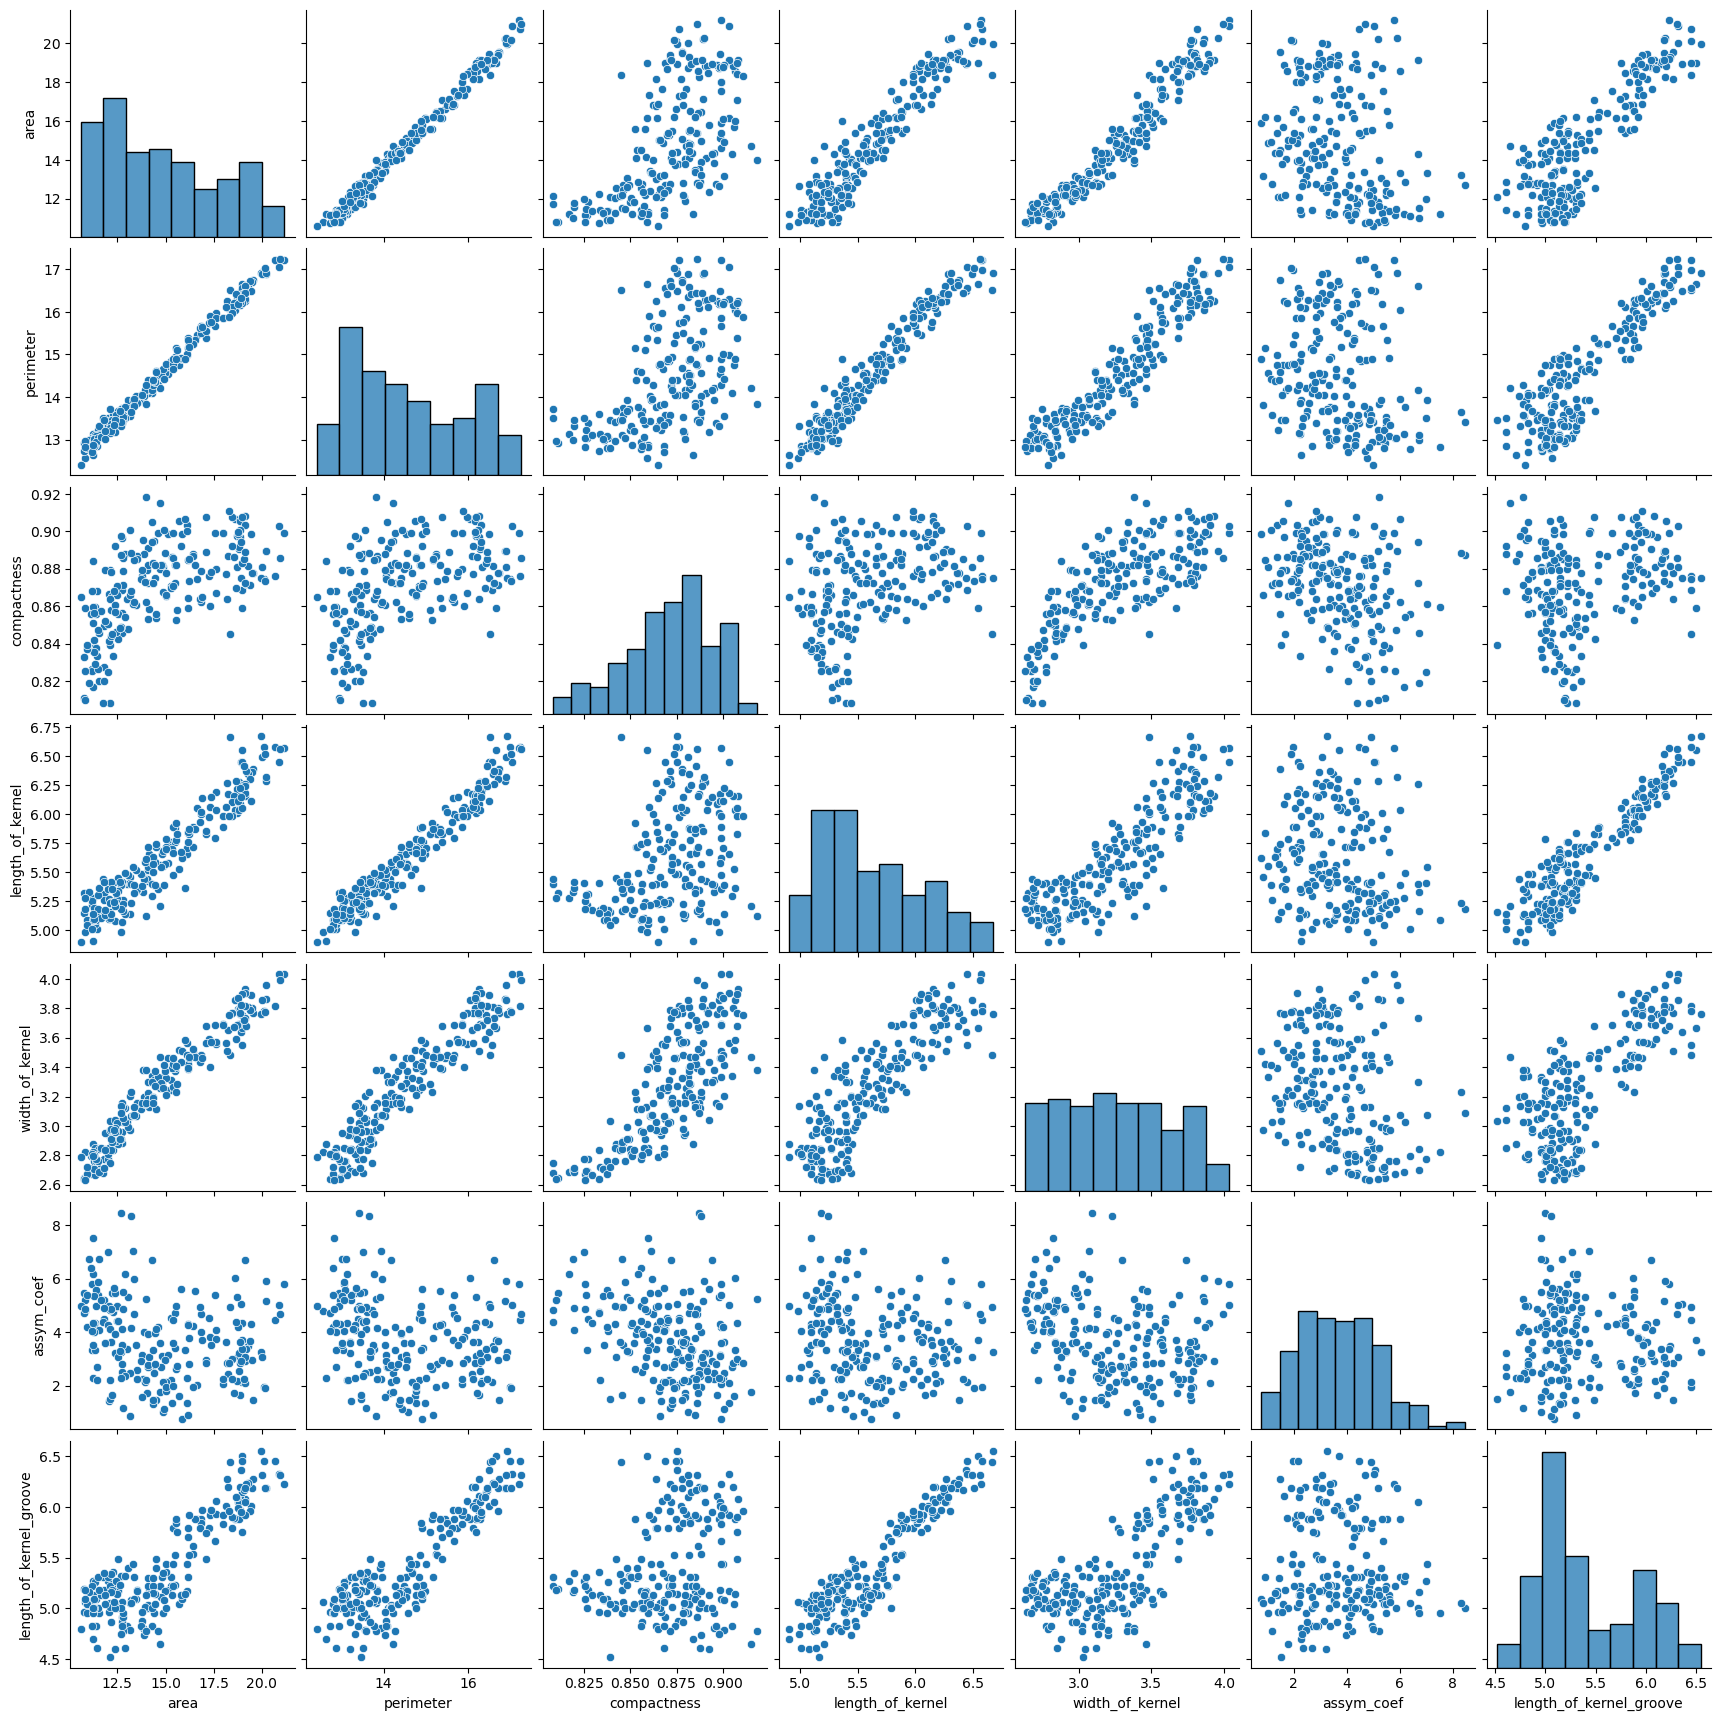

In [22]:
sns.pairplot(df);

# Data Preprocessing

## Drop the features that can't be used in clustering
* Hint:  there are no labels in clustering projects

In [27]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [28]:
X = df.drop(["kernel_class"], axis=1)

In [30]:
X
#datamızda ordinal ve kategorik featurelar varsa kmeans yerine kmode kullanılabilir.
#burada bütün featurelar continious olduğu için kmeans kullanıyoruz.

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17
...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04


In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [32]:
#pip install pyclustertend
#from pyclustertend import hopkins

from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]



In [34]:
hopkins(X, X.shape[0])
#0 a ne kadar yakınsa clusteringe o kadar uygundur..

0.19310035149921556

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [36]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia'nın sadece küme içine odaklandığına dikkat edelim.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.

In [37]:
ssd

[659.1717544870407,
 430.65897315130064,
 371.5811909715525,
 326.3061827611607,
 289.98412606307835,
 262.3496758683565,
 240.32361259444184,
 222.4007981117168]

In [38]:
pd.Series(ssd).diff()

0       NaN
1   -228.51
2    -59.08
3    -45.28
4    -36.32
5    -27.63
6    -22.03
7    -17.92
dtype: float64

In [45]:
fig = px.line(x = K, y = ssd, range_x=[1,10], hover_name = pd.Series(ssd).diff().values )

fig.show()
#difference ile her bir k değerinin bir önceki ile arasındaki farkları gözlemliyoruz

Text(0.5, 1.0, 'Elbow Method')

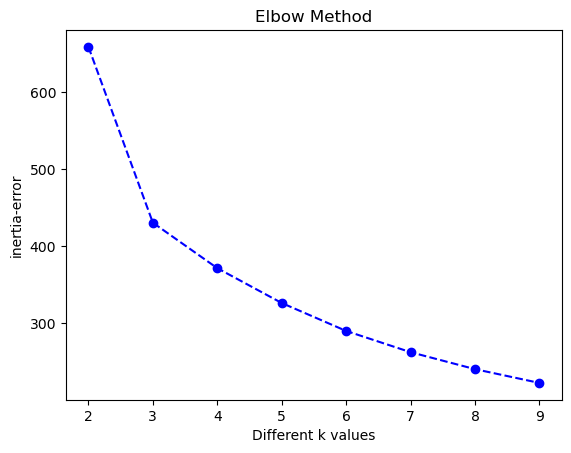

In [44]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("Elbow Method") 
#her k değerine karşılık ssd değerlerini gözlemliyoruz..
## elbow methodu inertia üzerinden hareket eder diğer kümelerle olan uzaklığa bakmaz.

In [46]:
from yellowbrick.cluster import KElbowVisualizer

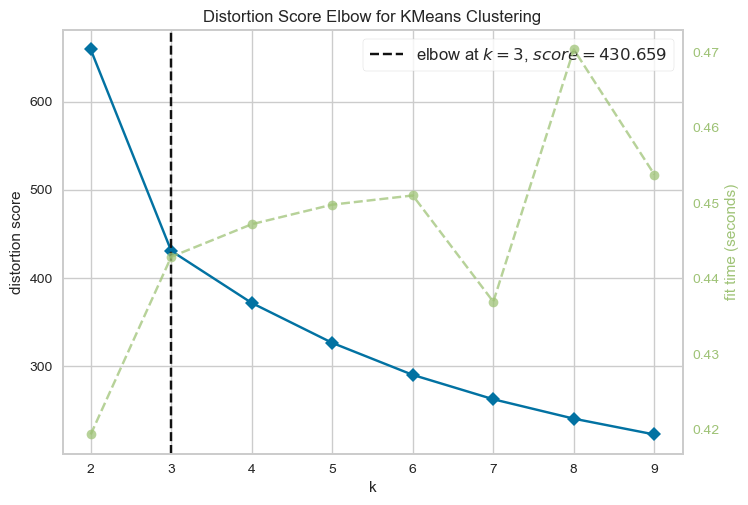

In [47]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof();
#yellowbrick bize clusteringi 3 olarak tavsiye ediyor.

### Model Building and label visualisation

In [48]:
#yellowbrick ve elbow method clusteringi 3 olarak tavsiye etti. bizde 3 ü seciyoruz..
model = KMeans(n_clusters=3,random_state=101)
model.fit(X)

KMeans(n_clusters=3, random_state=101)

In [49]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
#dfimize cluster sütunu ekleyerek labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz.
df["cluster"] = model.labels_
df.sample(5)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster
143,12.22,13.32,0.87,5.22,2.97,5.47,5.22,Canadian,1
28,14.11,14.18,0.88,5.54,3.22,2.75,5.04,Kama,2
102,19.46,16.50,0.90,6.11,3.89,4.31,6.01,Rosa,0
201,12.67,13.32,0.90,4.98,3.13,2.30,4.75,Canadian,2
181,12.46,13.41,0.87,5.24,3.02,4.99,5.15,Canadian,1


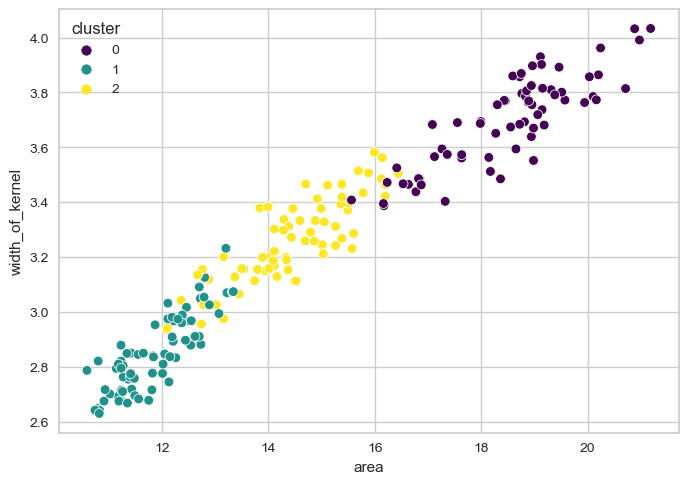

In [53]:
sns.scatterplot(df["area"], 
                df["width_of_kernel"], hue= df.cluster,palette= "viridis");

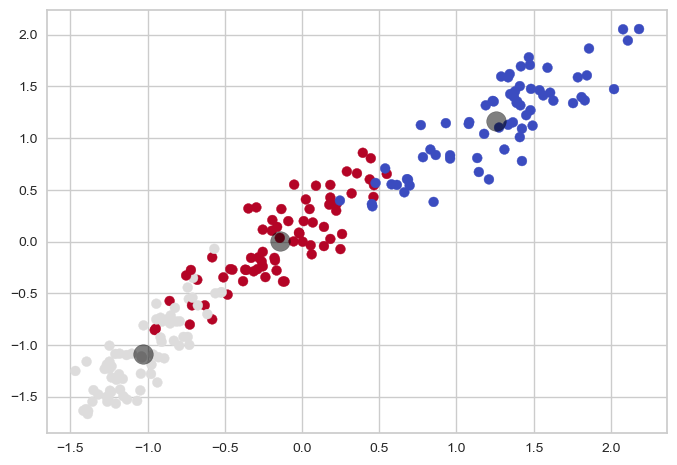

In [58]:
centroids = model.cluster_centers_

plt.scatter(X[:,0], X[:,4], c = df.cluster, s = 50, cmap = "coolwarm")
plt.scatter(centroids[:,0], centroids[:,4], c = "black", s = 200, alpha=0.5);
#center of clusters are black points

In [59]:
fig = px.scatter_3d(x=df["length_of_kernel_groove"],
                   y=df["width_of_kernel"],
                   z=df["length_of_kernel"],
                   color= df.cluster,
                   labels = {"x": "length_of_kernel_groove",
                             "y": "width_of_kernel",
                             "z": "length_of_kernel"},
                   hover_name= df["kernel_class"])

fig.show()

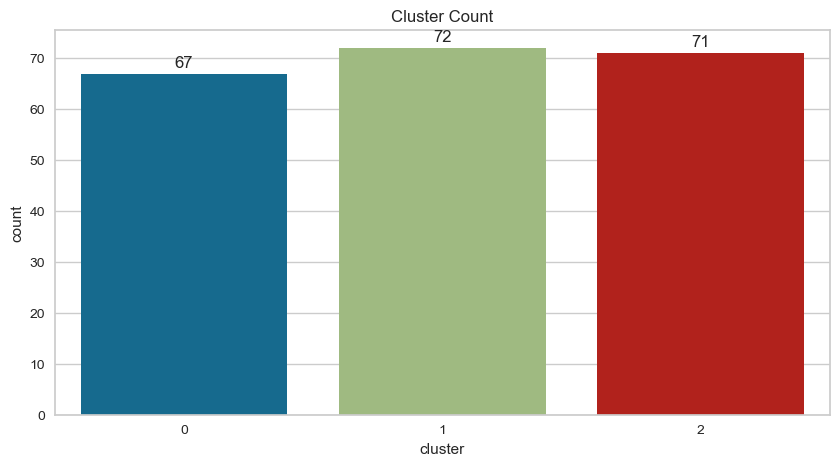

In [63]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster)
#ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [64]:
df[df["cluster"] == 0]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster
8,16.63,15.46,0.87,6.05,3.46,2.04,5.88,Kama,0
37,17.08,15.38,0.91,5.83,3.68,2.96,5.48,Kama,0
70,17.63,15.98,0.87,6.19,3.56,4.08,6.06,Rosa,0
71,16.84,15.67,0.86,6.00,3.48,4.67,5.88,Rosa,0
72,17.26,15.73,0.88,5.98,3.59,4.54,5.79,Rosa,0
...,...,...,...,...,...,...,...,...,...
131,18.94,16.32,0.89,6.14,3.83,2.91,5.95,Rosa,0
133,16.16,15.33,0.86,5.84,3.40,4.27,5.79,Rosa,0
134,15.56,14.89,0.88,5.78,3.41,4.97,5.85,Rosa,0
136,17.36,15.76,0.88,6.14,3.57,3.53,5.97,Rosa,0


In [65]:
pd.crosstab(df.kernel_class,df.cluster)
#toplamda 17 tane hatalı tahminde bulunmuş..

cluster,0,1,2
kernel_class,,,
Canadian,0,66,4
Kama,2,6,62
Rosa,65,0,5


### Evaluate 

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
print(f'Silhouette Score(n=3): {silhouette_score(X, df.cluster)}') # towards to 1 means, data good clustered by model
#silhouette between -1 and 1 

Silhouette Score(n=3): 0.40072705527512986


In [68]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
    #we dont choose k=2 because we know  the inertia was large at k=2

For n_clusters=2, the silhouette score is 0.46577247686580914
For n_clusters=3, the silhouette score is 0.40072705527512986
For n_clusters=4, the silhouette score is 0.3369008229710853
For n_clusters=5, the silhouette score is 0.2863816249628832
For n_clusters=6, the silhouette score is 0.27930886443779596
For n_clusters=7, the silhouette score is 0.2825195561066108
For n_clusters=8, the silhouette score is 0.251137716662038


In [70]:
 from sklearn.metrics.cluster import adjusted_rand_score as ari

In [71]:
kmeans_ari = ari(df["kernel_class"], df.cluster)
kmeans_ari
#looks at the similarity between the two clusters

0.7732937360806309

## Hierarchical Clustering

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

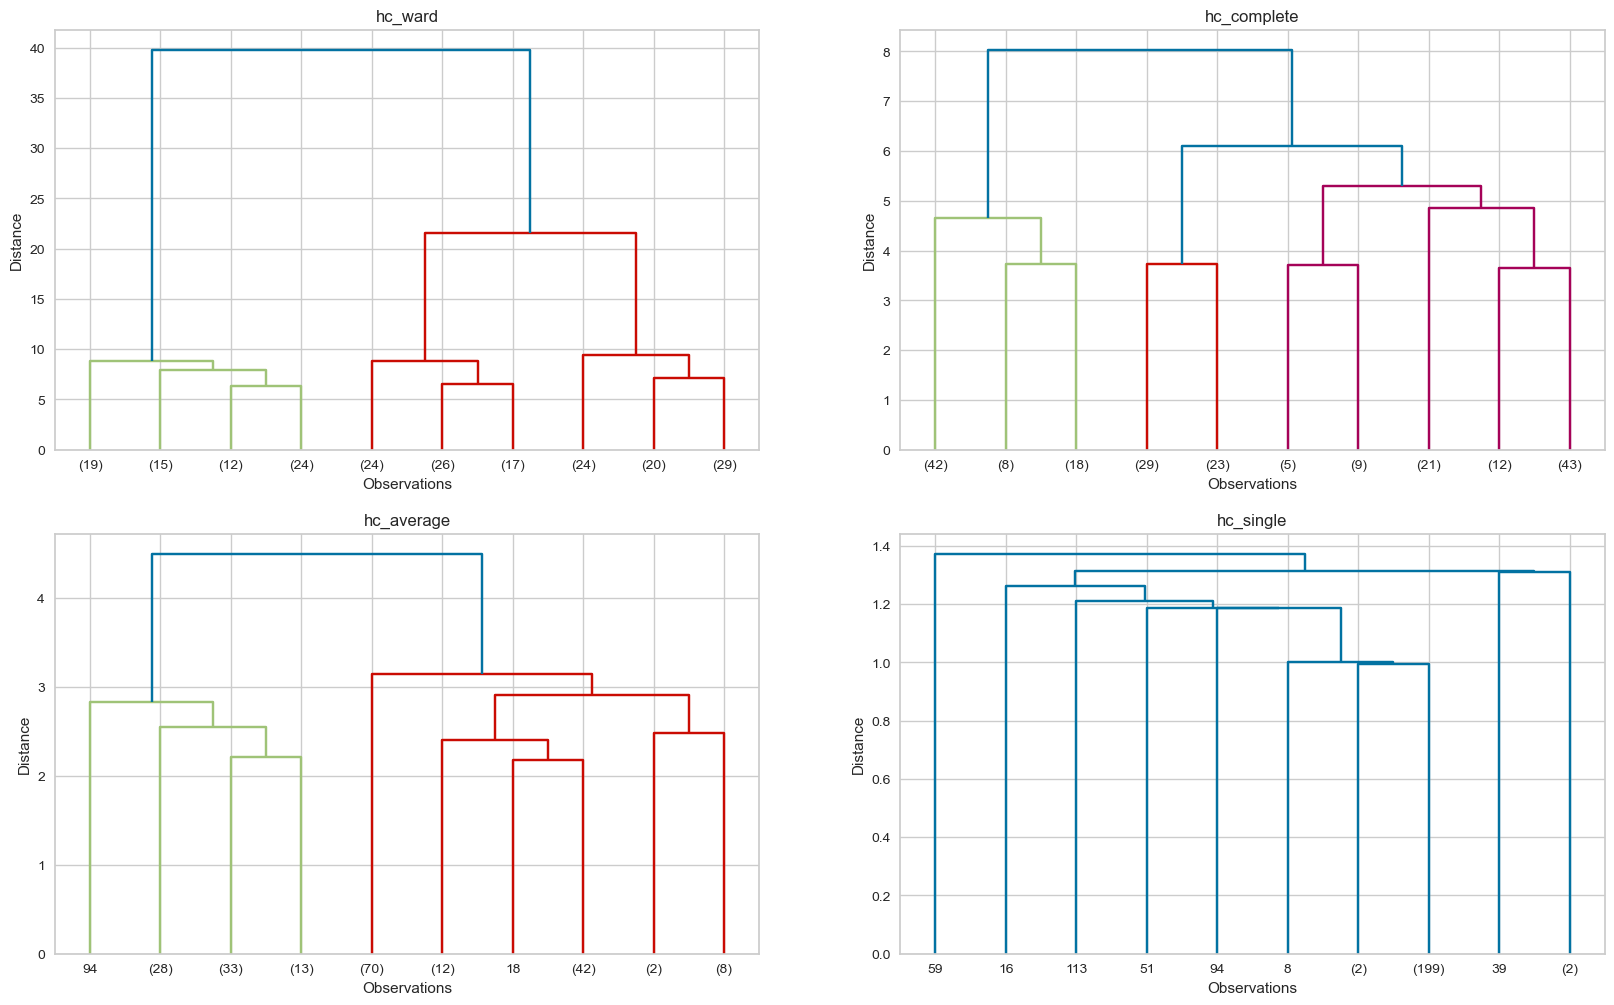

In [73]:
linkage_dict = {"hc_ward" : linkage(y = X, method = "ward"),#varyans hangisine yakınsa o degere atar.
                "hc_complete" : linkage(X, "complete"),#en uzak noktaya göre
                "hc_average" : linkage(X, "average"),#ortalama degerine göre
                "hc_single" : linkage(X, "single")}#en yakın noktaya göre


plot_list = list(range(221,225))

plt.figure(figsize = (20,12))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method,truncate_mode = "lastp", p = 10, leaf_font_size = 10)

### Model Building and label visualisation

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [77]:
df["cluster_1"] = model1.labels_
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama,2,0
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama,2,0
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama,2,0
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama,2,0
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,Kama,2,0
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87,Canadian,1,2
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00,Canadian,1,2
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06,Canadian,1,2
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04,Canadian,1,2


In [78]:
fig = px.scatter_3d(x=df["length_of_kernel_groove"],
                   y=df["width_of_kernel"],
                   z=df["length_of_kernel"],
                   color= df.cluster,
                   labels = {"x": "length_of_kernel_groove",
                             "y": "width_of_kernel",
                             "z": "length_of_kernel"},
                   hover_name= df["kernel_class"])

fig.show()

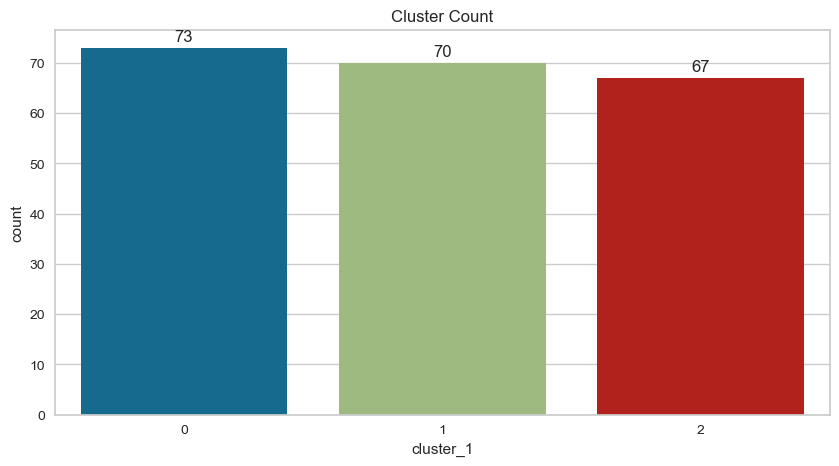

In [79]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_1)
#ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [80]:
pd.crosstab(df.kernel_class,df.cluster_1)
#15 hatalı tahminde bulunmuş.. bir öncekinde 17 hatalı tahmin vardı.

cluster_1,0,1,2
kernel_class,,,
Canadian,5,0,65
Kama,64,4,2
Rosa,4,66,0


### Evaluate 

In [81]:
print(f'Silhouette Score(n=3): {silhouette_score(X, df.cluster_1)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=3): 0.3926339709101015


In [82]:
agglo_ari = ari(df["kernel_class"], df.cluster_1)
agglo_ari

0.796998283593012

In [83]:
kmeans_ari,  silhouette_score(X, df.cluster)

(0.7732937360806309, 0.40072705527512986)

# Feature Engineering (PCA)

In [84]:
#featurelardan componentler oluşturup boyutumuzu azaltabiliriz..
#componentler 7 featureın belli bilgilerine sahip olmuş olacak..
#corelasyon u daha yüksek featurelardan oluştuğunda component kalitesi artar.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

new_X = pca.fit_transform(X)

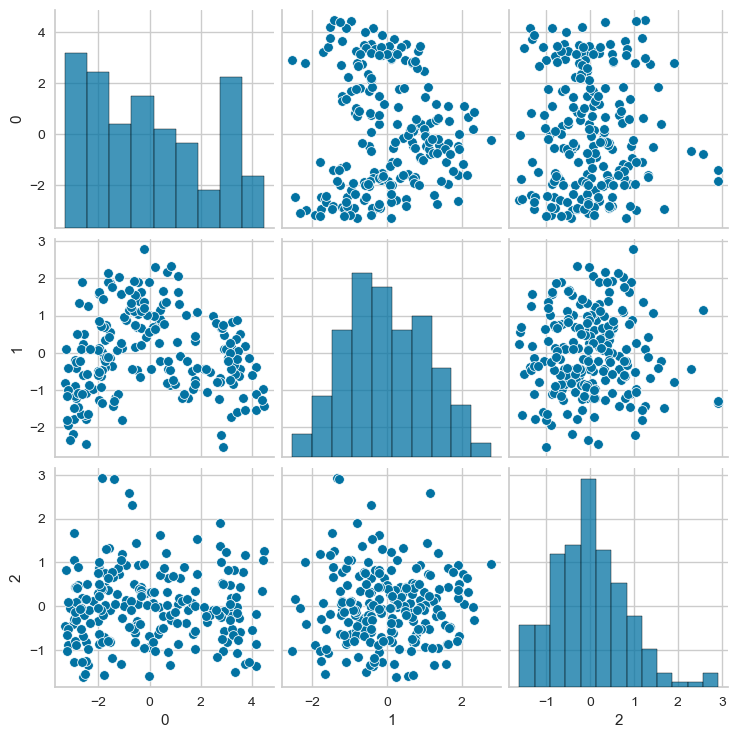

In [85]:
sns.pairplot(pd.DataFrame(new_X));

In [86]:
hopkins(new_X, new_X.shape[0])

0.34482461947081744

In [87]:
model_pca = KMeans(n_clusters=3,random_state=42)
model_pca.fit(new_X)

KMeans(n_clusters=3, random_state=42)

In [88]:
pd.crosstab(df["kernel_class"],model_pca.labels_) # 1--17, 2--15, 3--16, 4--16

col_0,0,1,2
kernel_class,,,
Canadian,66,0,4
Kama,5,2,63
Rosa,0,65,5


In [89]:
df["cluster_pca"] = model_pca.labels_
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1,cluster_pca
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama,2,0,2
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama,2,0,2
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama,2,0,2
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama,2,0,2
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,Kama,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87,Canadian,1,2,0
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00,Canadian,1,2,0
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06,Canadian,1,2,0
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04,Canadian,1,2,0


In [90]:
print(f'Silhouette Score(n=3): {silhouette_score(new_X, df.cluster_pca)}')

Silhouette Score(n=3): 0.41008236393503866


In [91]:
ari(df["kernel_class"], df.cluster_pca)

0.7850359051341558

In [92]:
fig = px.scatter_3d(x=new_X[:,0],
                   y=new_X[:,1],
                   z=new_X[:,2],
                   color= model_pca.labels_,
                   labels = {"x": "first comp.",
                             "y": "second comp.",
                             "z": "third comp."},
                   hover_name= df["kernel_class"])

fig.show()

In [93]:
model1_pca = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1_pca.fit_predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [94]:
pd.crosstab(df["kernel_class"], model1_pca.labels_) # 1--17 ,2--15, 3--16, 4--16

col_0,0,1,2
kernel_class,,,
Canadian,5,0,65
Kama,64,1,5
Rosa,5,65,0


In [95]:
df["cluster1_pca"] = model1_pca.labels_
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1,cluster_pca,cluster1_pca
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama,2,0,2,0
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama,2,0,2,0
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama,2,0,2,0
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama,2,0,2,0
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,Kama,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87,Canadian,1,2,0,2
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00,Canadian,1,2,0,2
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06,Canadian,1,2,0,2
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04,Canadian,1,2,0,2


In [96]:
print(f'Silhouette Score(n=3): {silhouette_score(new_X, df.cluster1_pca)}')

Silhouette Score(n=3): 0.40314992196781246


In [97]:
ari(df["kernel_class"], df.cluster1_pca)

0.784382796580442

In [98]:
fig = px.scatter_3d(x=new_X[:,0],
                   y=new_X[:,1],
                   z=new_X[:,2],
                   color= model1_pca.labels_,
                   labels = {"x": "first comp.",
                             "y": "second comp.",
                             "z": "third comp."},
                   hover_name= df["kernel_class"])

fig.show()

Tranductive <= hierachical,
Inductive <= Kmeans 

# DBSCAN (optional)
* link : https://scikit-learn.org/stable/modules/clustering.html#dbscan 

In [99]:
from sklearn.cluster import DBSCAN

In [100]:
np.linspace(0.1,2,20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [101]:
z=0
for i in np.linspace(0.1,2,20) :
    for x in range(1,10):
        model2 = DBSCAN(eps=i,min_samples=x)
        if pd.Series(model2.fit_predict(X)).nunique() == 3:
            print(i,x)
            #break

0.8999999999999999 3
0.8999999999999999 7
0.8999999999999999 8
0.8999999999999999 9
0.9999999999999999 2
0.9999999999999999 7
0.9999999999999999 8
0.9999999999999999 9
1.0999999999999999 2
1.2 2
1.3 2


In [102]:
model2 = DBSCAN()#(eps=1.3,min_samples=2)

In [103]:
model2.fit_predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1], dtype=int64)

In [104]:
df["cluster_2"] = model2.labels_

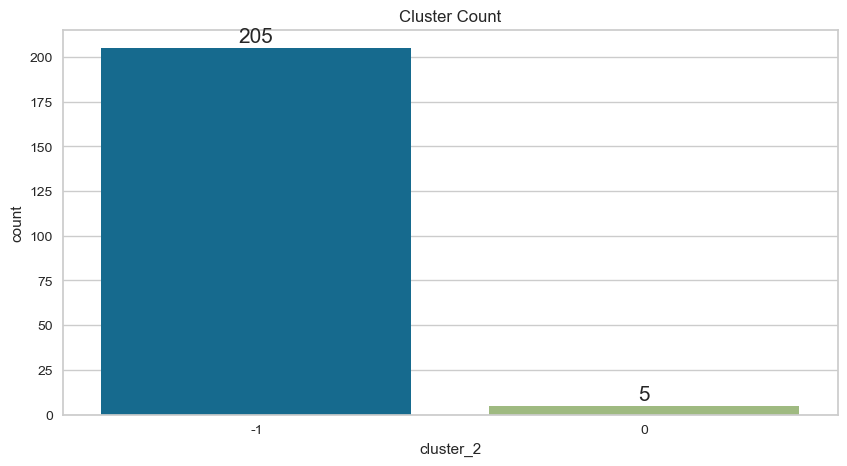

In [105]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_2)
#ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [106]:
df[df["cluster_2"]==0]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1,cluster_pca,cluster1_pca,cluster_2
91,18.76,16.20,0.90,6.17,3.80,3.12,6.05,Rosa,0,1,1,1,0
92,18.81,16.29,0.89,6.27,3.69,3.24,6.05,Rosa,0,1,1,1,0
106,18.85,16.17,0.91,6.15,3.81,2.84,6.20,Rosa,0,1,1,1,0
118,18.89,16.23,0.90,6.23,3.77,3.64,5.97,Rosa,0,1,1,1,0
131,18.94,16.32,0.89,6.14,3.83,2.91,5.95,Rosa,0,1,1,1,0


# GAUSSIAN MIXTURE (Optional)
* link : https://scikit-learn.org/stable/modules/mixture.html

In [107]:
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

In [111]:
model3 = GaussianMixture(n_components=3,n_init=3, covariance_type="full", random_state=42)

In [112]:
model3.fit_predict(new_X)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [113]:
df["cluster_3"] = model3.fit_predict(new_X)

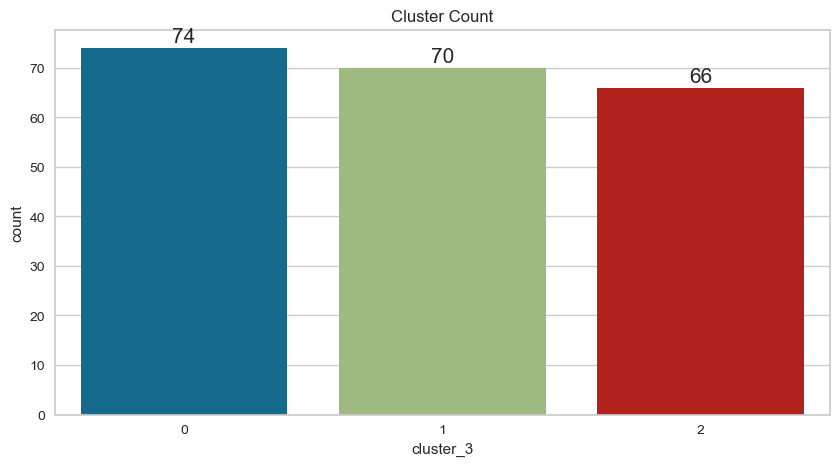

In [114]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_3)
#ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show();

In [115]:
pd.crosstab(df["kernel_class"], df["cluster_3"])

cluster_3,0,1,2
kernel_class,,,
Canadian,67,0,3
Kama,7,4,59
Rosa,0,66,4


In [116]:
pd.DataFrame(model3.predict_proba(new_X)).iplot(kind="bar")